#### HANDLING MISSING VALUES(TITANIC DATASET)

#### 1) MCAR [Missing completely at random]


In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### In the above output age and cabin does not belong to Macr as they are dependent on one another as the data was collected after the titanic sank and they cannot gather information 
#### Whereas the Embarked is independent and means the pickup/drop point of traveller

In [3]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### In the above cell the empty values of embarked are stored into a new dataframe

#### 2) Missing not at random[MNAR]
   There is relationship between data missing and any other value in the data set

In [4]:
# The above where function behaves as a where clause where first entry is condition and if true replace by 1 and if false replace by 0
#NAN values replace by 1 rest is replaced by 0
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
# TO find out the percentage of missing values we find mean
df['cabin_null'].mean()


0.7710437710437711

In [5]:
# The above where function behaves as a where clause where first entry is condition and if true replace by 1 and if false replace by 0
#NAN values replace by 1 rest is replaced by 0
import numpy as np
df['age_null'] = np.where(df['Age'].isnull(),1,0)
# TO find out the percentage of missing values we find mean
df['age_null'].mean()

0.19865319865319866

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null',
       'age_null'],
      dtype='object')

In [7]:
# percentage of survived whose data is missing is 0.6 and whose data not missing is 0.87
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### TECHNIQUE TO  HANDLE MISSING VALUES


#### 1) MEAN/MEDIAN/MODE REPLACEMENT

In [8]:
#Only 3 colums used to check missing values
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
# Lets find percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
# A function is written to create a new column and fill it with the median values
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    

In [11]:
# median for age is found out
median = df.Age.median()
median

28.0

In [12]:
#Calling the function
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
#We check the stndard deviation before and after replacing and there is only slight change
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [15]:
import pyodide_js
await pyodide_js.loadPackage("scipy")

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

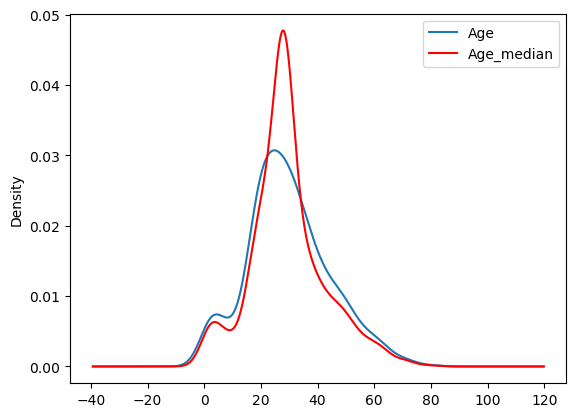

In [17]:

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')